In [ ]:
%%capture
!pip install mne

In [ ]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%%capture
#adhd_file_path='/content/drive/MyDrive/ADHD CSV 2/ADHD/' #Aryaman's Drive Path
#control_file_path='/content/drive/MyDrive/ADHD CSV 2/Control/' #Aryaman's Drive Path
adhd_file_path='/content/drive/MyDrive/ADHD/'#Aditi's Drive Path
control_file_path='/content/drive/MyDrive/Control/'#Aditi's Drive Path

directory_files = os.listdir(adhd_file_path)
adhd_segment_list=[]
for file in directory_files:
  data1=pd.read_csv(os.path.join(adhd_file_path,file))
  data = data1.drop(columns=[data1.columns[0]])
  channel_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']
  data_values = data.values.T
  sfreq = 128
  info = mne.create_info(channel_names, sfreq,ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg'])
  raw = mne.io.RawArray(data_values,info)
  # Segmenting the raw data into segments of 6 seconnds with overlapping of 1
  segments = mne.make_fixed_length_events(raw,id=1,duration=6.0,overlap=1)
  segmented_data = mne.Epochs(raw, segments, baseline=None)
  raw_with_segments = segmented_data.get_data()
  adhd_segment_list.append(raw_with_segments)

#Reading events from all patient files
control_segment_list=[]
directory_files = os.listdir(control_file_path)
for file in directory_files:
  data1=pd.read_csv(os.path.join(control_file_path,file))
  data= data1.drop(columns=[data1.columns[0]])
  channel_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']
  data_values = data.values.T
  sfreq = 128
  info = mne.create_info(channel_names, sfreq,ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg'])
  raw = mne.io.RawArray(data_values,info)
  # Segmenting the raw data into segments of 6 seconds with overlapping of 1
  segments = mne.make_fixed_length_events(raw,id=1,duration=6.0,overlap=1)
  segmented_data = mne.Epochs(raw, segments, baseline=None)
  raw_with_segments = segmented_data.get_data()
  control_segment_list.append(raw_with_segments)



Creating RawArray with float64 data, n_channels=19, n_times=25003
    Range : 0 ... 25002 =      0.000 ...   195.328 secs
Ready.
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 91 original time points ...
1 bad epochs dropped
Creating RawArray with float64 data, n_channels=19, n_times=21372
    Range : 0 ... 21371 =      0.000 ...   166.961 secs
Ready.
Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 91 original time points ...
1 bad epochs dropped
Creating RawArray with float64 data, n_channels=19, n_times=19713
    Range : 0 ... 19712 =      0.000 ...   154.000 secs
Ready.
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 91 original time points ...
1 bad epochs dropped
Crea

In [ ]:
control_segment_labels=[len(i)*[0] for i in control_segment_list]
adhd_segment_labels=[len(i)*[1]for i in adhd_segment_list]
len(control_segment_labels),len(adhd_segment_labels)
#60 Control patients, 61 ADHD patients

(60, 61)

In [ ]:
data_list=control_segment_list+adhd_segment_list
label_list=control_segment_labels+adhd_segment_labels

In [ ]:
group_list=[[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

121

In [ ]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(group_list)

In [ ]:
data_array.shape,label_array.shape,group_array.shape

((3177, 19, 91), (3177,), (3177,))

In [ ]:
data_array=np.moveaxis(data_array,2,1)
data_array.shape

(3177, 91, 19)

In [ ]:
%%capture
!pip install tensorflow

In [ ]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
#from keras.optimizers import Nadam
#from keras.regularizers import l2
from tensorflow.keras.backend import clear_session
def cnnmodel():
  clear_session()
  model=Sequential()
  model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(91,19)))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(AveragePooling1D(pool_size=2,strides=2))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))
  model.add(LeakyReLU())
  model.add(GlobalAveragePooling1D())
  #model.add(BatchNormalization())
  #model.add(AveragePooling1D(pool_size=2,strides=2))
  model.add(Dense(48,activation='sigmoid'))
  model.add(Dense(32,activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))


  optimizer = SGD(learning_rate=0.0001)


  model.compile('SGD',loss='binary_crossentropy',metrics=['accuracy'])
  return model
model=cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 89, 5)             290       
                                                                 
 batch_normalization (Batch  (None, 89, 5)             20        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 89, 5)             0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 44, 5)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 42, 5)             80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 42, 5)             0

In [ ]:
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [ ]:
#from keras.callbacks import LearningRateScheduler
accuracy=[]
for train_index,val_index in gkf.split(data_array,label_array,groups=group_array):
  train_features,train_labels=data_array[train_index],label_array[train_index]
  val_features,val_labels=data_array[val_index],label_array[val_index]
  scaler=StandardScaler()
  train_features=scaler.fit_transform(train_features.reshape(-1,train_features.shape[-1])).reshape(train_features.shape)
  val_features=scaler.fit_transform(val_features.reshape(-1,val_features.shape[-1])).reshape(val_features.shape)
  model=cnnmodel()
  early_stopping = EarlyStopping(monitor='val_loss', patience=8, verbose=1, restore_best_weights=True)
  '''def lr_schedule(epoch):
    if epoch < 30:
        return 0.01
    elif epoch < 60:
        return 0.001
    else:
        return 0.0001
  learning_rate_scheduler = LearningRateScheduler(lr_schedule)'''
  history=model.fit(train_features,train_labels,epochs=45,batch_size=15,validation_data=(val_features,val_labels))
  accuracy.append(model.evaluate(val_features,val_labels)[1])
  break

Epoch 1/45
169/169 [==============================] - 20s 26ms/step - loss: 0.7020 - accuracy: 0.5038 - val_loss: 0.6826 - val_accuracy: 0.7127
Epoch 2/45
169/169 [==============================] - 2s 13ms/step - loss: 0.6982 - accuracy: 0.5164 - val_loss: 0.6784 - val_accuracy: 0.7127
Epoch 3/45
169/169 [==============================] - 3s 16ms/step - loss: 0.6977 - accuracy: 0.5144 - val_loss: 0.6916 - val_accuracy: 0.6801
Epoch 4/45
169/169 [==============================] - 2s 14ms/step - loss: 0.6964 - accuracy: 0.5002 - val_loss: 0.6854 - val_accuracy: 0.7127
Epoch 5/45
169/169 [==============================] - 4s 21ms/step - loss: 0.6961 - accuracy: 0.5018 - val_loss: 0.6767 - val_accuracy: 0.7127
Epoch 6/45
169/169 [==============================] - 4s 22ms/step - loss: 0.6950 - accuracy: 0.5219 - val_loss: 0.6772 - val_accuracy: 0.7127
Epoch 7/45
169/169 [==============================] - 3s 16ms/step - loss: 0.6949 - accuracy: 0.5223 - val_loss: 0.6775 - val_accuracy: 0.712

In [ ]:
train_features.reshape(-1,train_features.shape[-1]).shape

(230503, 19)

In [ ]:
np.mean(accuracy)

0.8757764101028442

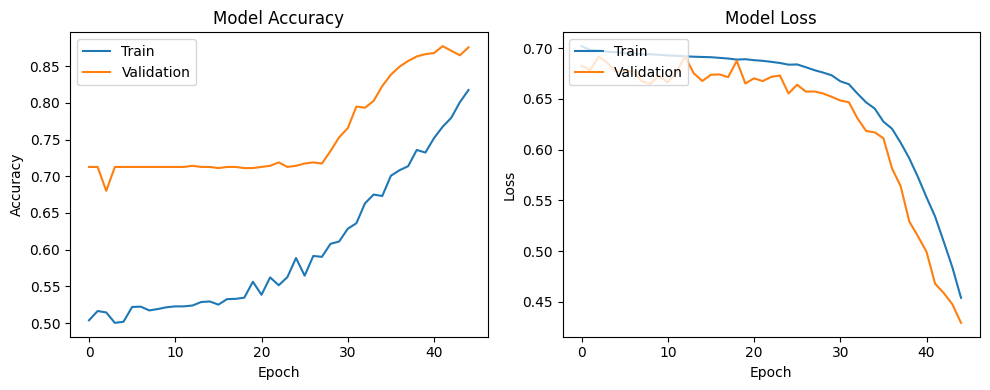

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Initial**

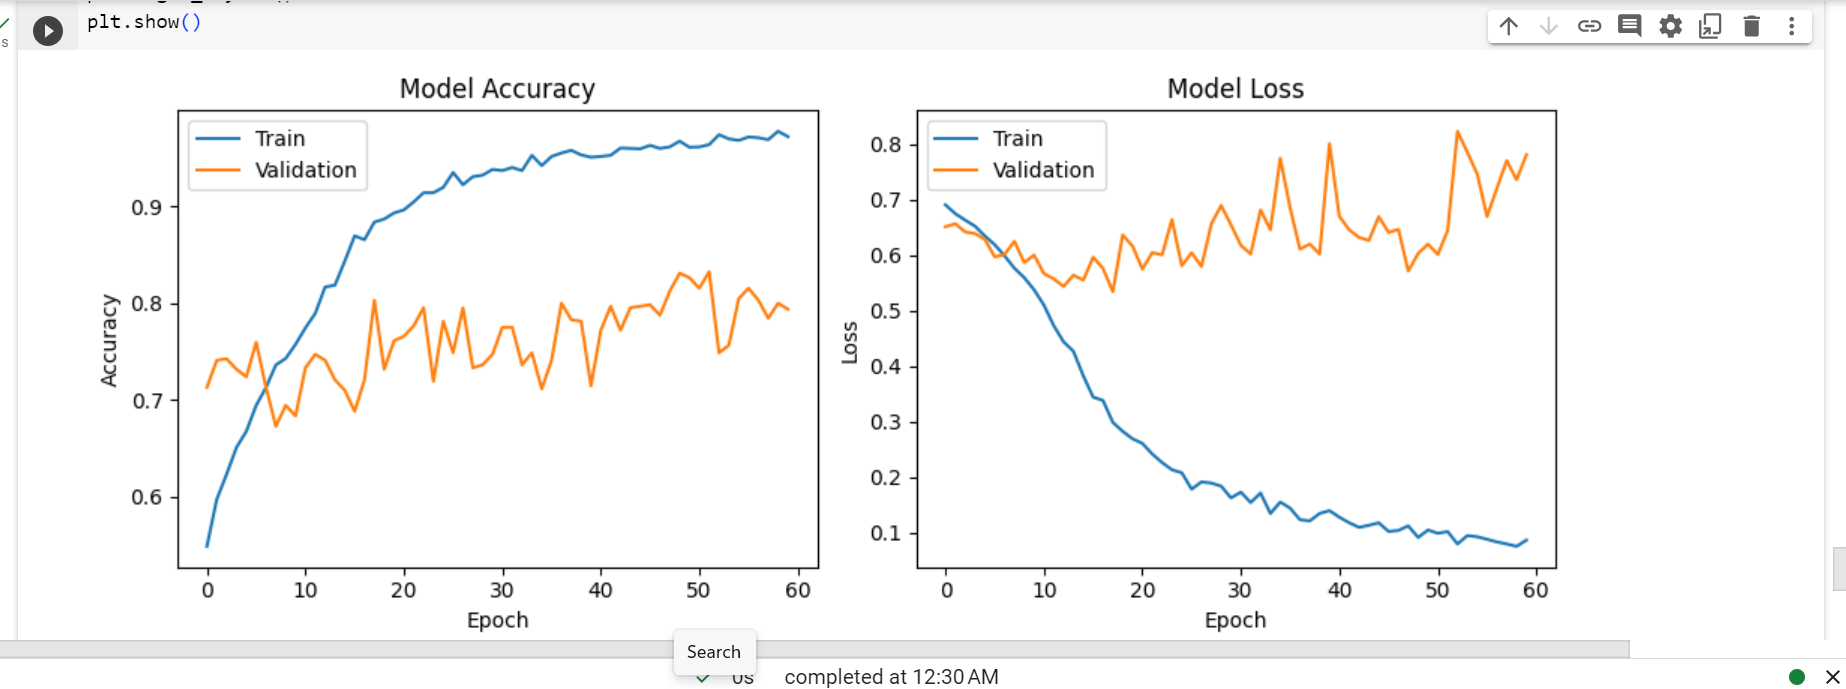

**Best Model accuracy ,Linearing Decreasing and Stable Validation Loss obtained with Learning Rate=0.001,Epochs=45,Batch_Size=15**

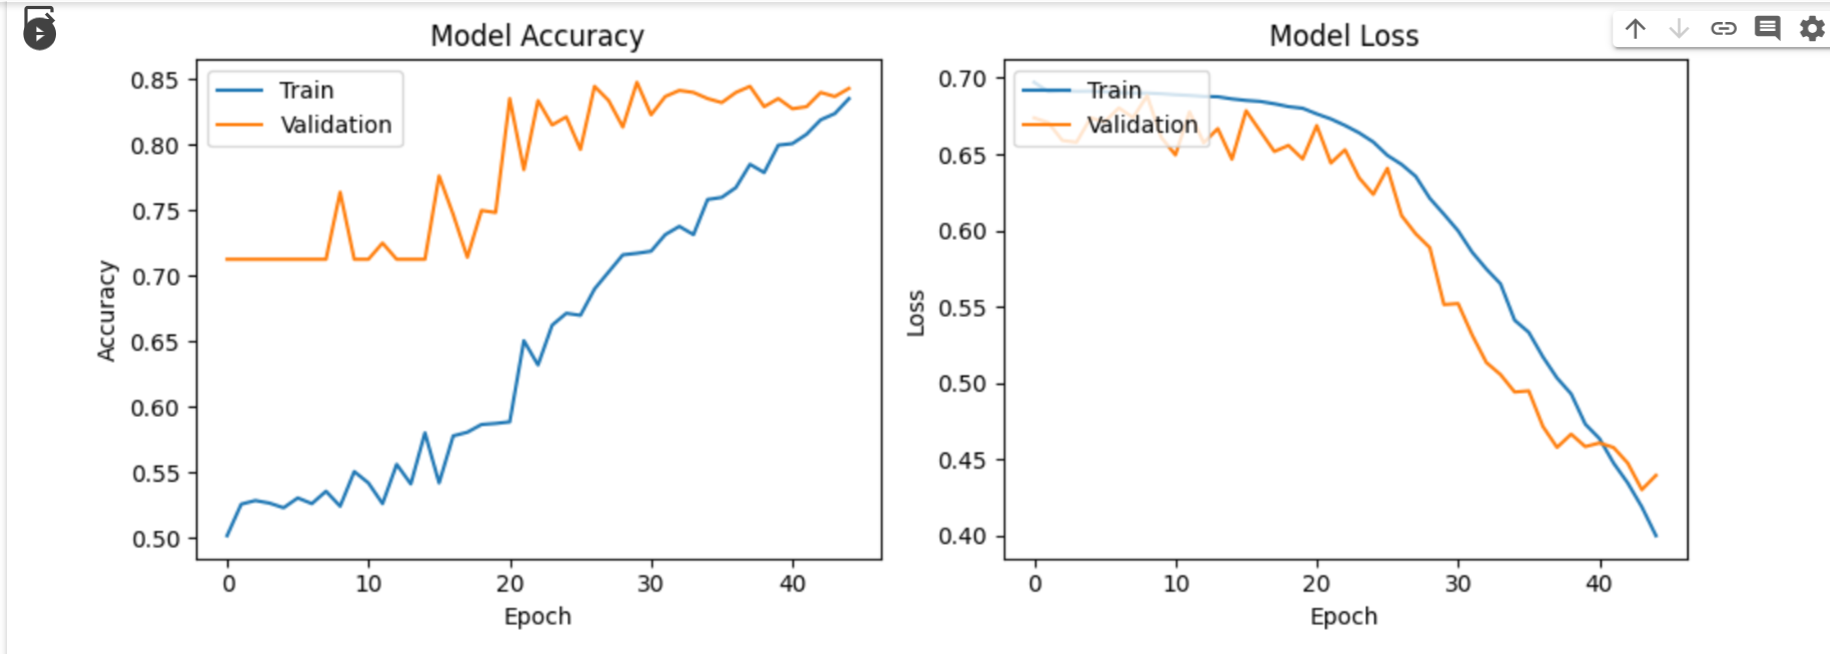